In [1]:
cd "/content/drive/My Drive/Predict Bitcoin"

/content/drive/My Drive/Predict Bitcoin


In [0]:
bitstamp_path = "./bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv"
coinbase = "./coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
bit_data = pd.read_csv(bitstamp_path)
coin_data = pd.read_csv(coinbase)

In [0]:
bit_data['date'] = pd.to_datetime(bit_data['Timestamp'], unit = 's').dt.date

In [14]:
bit_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
...,...,...,...,...,...,...,...,...,...
4363452,1587513360,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790,2020-04-21
4363453,1587513420,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449,2020-04-21
4363454,1587513480,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966,2020-04-21
4363455,1587513540,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090,2020-04-21


In [0]:
group = bit_data.groupby('date')

In [13]:
group.head(5)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
...,...,...,...,...,...,...,...,...,...
4362017,1587427260,6824.40,6837.13,6821.26,6837.13,9.370150,64015.647342,6831.870216,2020-04-21
4362018,1587427320,6849.75,6863.77,6844.93,6857.31,6.147032,42113.893983,6851.094434,2020-04-21
4362019,1587427380,6851.25,6857.62,6844.07,6857.62,0.239654,1640.909046,6846.991535,2020-04-21
4362020,1587427440,6850.41,6857.61,6836.75,6836.75,6.578205,45066.453020,6850.873641,2020-04-21


In [0]:
data = group['Close'].mean()

In [16]:
data.head()

date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

In [18]:
data.isnull().sum()

0

In [0]:
close_train = data.iloc[:(len(data))-50].values
close_test = data.iloc[(len(data)-50):].values

In [0]:
close_train = close_train.reshape(close_train.shape[0],1)
close_test = close_test.reshape(close_test.shape[0],1)

In [27]:
close_train.shape

(2983, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
close_scaled = scaler.fit_transform(close_train)

In [0]:
timestep = 50
x_train = []
y_train = []

for i in range(timestep, close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [35]:
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (2933, 50, 1)
y_train shape=  (2933,)


In [0]:
input_test = data.iloc[len(data)-len(close_test)-timestep:].values
input_test = input_test.reshape(-1,1)
input_test = scaler.transform(input_test)

In [38]:
input_test.shape

(100, 1)

In [0]:
x_test = []
for i in range(timestep, input_test.shape[0]):
    x_test.append(input_test[i-timestep:i,0])
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(x_train,y_train,epochs=100,batch_size=64)

Using TensorFlow backend.


Epoch 1/100
2933/2933 [==============================] - 12s 4ms/step - loss: 0.0071
Epoch 2/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0026
Epoch 3/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0016
Epoch 4/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0015
Epoch 5/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0012
Epoch 6/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0010
Epoch 7/100
2933/2933 [==============================] - 10s 3ms/step - loss: 8.9702e-04
Epoch 8/100
2933/2933 [==============================] - 10s 3ms/step - loss: 9.9645e-04
Epoch 9/100
2933/2933 [==============================] - 10s 3ms/step - loss: 0.0010
Epoch 10/100
2933/2933 [==============================] - 10s 3ms/step - loss: 7.9496e-04
Epoch 11/100
2933/2933 [==============================] - 10s 3ms/step - loss: 7.1836e-04
Epoch 12/100
2933/2933 [=======================

In [0]:
regressor.save("predict_bitcoin.h5")

In [0]:
import tensorflow as tf
saved_model =  tf.keras.models.load_model('predict_bitcoin.h5')

In [0]:
predicted_data=saved_model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)


In [0]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)


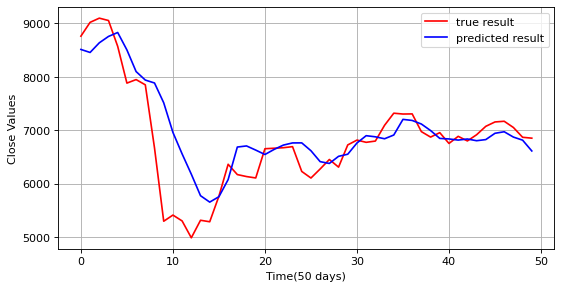

In [45]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
2933/2933 [==============================] - 11s 4ms/step - loss: 0.0238
Epoch 2/100
2933/2933 [==============================] - 11s 4ms/step - loss: 0.0057
Epoch 3/100
2933/2933 [==============================] - 10s 4ms/step - loss: 0.0026
Epoch 4/100
2933/2933 [==============================] - 10s 4ms/step - loss: 0.0013
Epoch 5/100
2933/2933 [==============================] - 10s 4ms/step - loss: 9.3218e-04
Epoch 6/100
2933/2933 [==============================] - 10s 4ms/step - loss: 7.4508e-04
Epoch 7/100
2933/2933 [==============================] - 10s 4ms/step - loss: 6.4443e-04
Epoch 8/100
2933/2933 [==============================] - 10s 4ms/step - loss: 5.3860e-04
Epoch 9/100
2933/2933 [==============================] - 10s 4ms/step - loss: 4.7518e-04
Epoch 10/100
2933/2933 [==============================] - 10s 3ms/step - loss: 4.5724e-04
Epoch 11/100
2933/2933 [==============================] - 10s 4ms/step - loss: 4.0683e-04
Epoch 12/100
2933/2933 [===========

In [0]:
model.save("predict_bitcoin_LSTM.h5")

In [52]:
saved_model =  tf.keras.models.load_model('predict_bitcoin_LSTM.h5')

In [0]:
predicted_data=saved_model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)


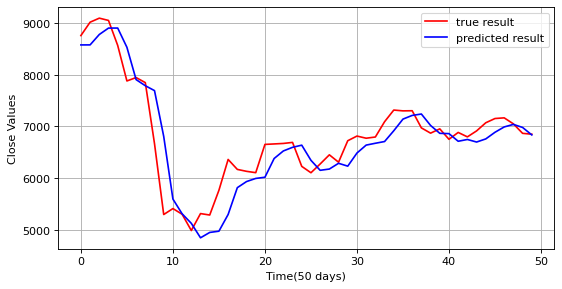

In [54]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()